In [1]:
import csv 
import os
import numpy as np
import random
from sklearn.metrics import roc_curve
import math
from matplotlib import pyplot
import datetime
from sklearn.metrics import auc, roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns
from pandas import DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from scipy.signal import find_peaks
import plotly.graph_objects as go
from scipy import fft
from scipy import signal as sig
from scipy.stats import multivariate_normal
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from numpy import arange
from math import sqrt
from numpy import argmax
import random as rn
import h2o
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.metrics import precision_recall_curve
sb.set_style(style="whitegrid")
sb.set_color_codes()
import scipy.ndimage

In [2]:
import h2o
from h2o.estimators import H2OExtendedIsolationForestEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,9 mins 30 secs
H2O_cluster_timezone:,Africa/Cairo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_khattab_4wkr3p
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.580 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [3]:
df = pd.read_csv("F://phd//download//TTDD-main//TTDD-main//odd_water.csv", parse_dates=['date'])

traiX=(df.loc[df["date"].dt.weekday > 1])
#per = traiX.date.dt.to_period("D")
#g = traiX.groupby(per)
#traiX=g.agg(np.mean)

tesX=(df.loc[df["date"].dt.weekday <=1])
#per = tesX.date.dt.to_period("D")
#g = tesX.groupby(per)

#tesX=g.agg(np.mean)

print(tesX)



                    date      Level    Cond    Tur  label_Level  label_Cond  \
24   2017-03-13 00:42:00  14.160000  197.57   2.83            0           0   
25   2017-03-13 01:42:00  14.160000  197.68   2.03            0           0   
26   2017-03-13 02:42:00  14.160000  197.93   1.45            0           0   
27   2017-03-13 03:42:00  14.160000  198.21   1.95            0           0   
28   2017-03-13 04:42:00  14.160000  198.56   1.62            0           0   
...                  ...        ...     ...    ...          ...         ...   
6298 2018-12-03 16:42:00  14.170000  136.08  20.82            0           0   
6299 2018-12-03 18:12:00  14.172222  137.82  22.23            0           0   
6300 2018-12-03 19:42:00  14.174444  137.26  20.59            0           0   
6301 2018-12-03 21:12:00  14.170000  136.63  19.94            0           0   
6302 2018-12-03 22:42:00  14.170000  136.71  20.64            0           0   

      label_Tur  
24            0  
25            0

In [4]:

dftotal = pd.DataFrame(traiX.values[:,0:4]) 
dftotal.insert(0, 'id', range(1, 1 + len(dftotal)))
print(dftotal)
test= pd.DataFrame(tesX.values[:,0:4])
test.insert(0, 'id', range(1, 1 + len(test)))


        id                   0      1       2      3
0        1 2017-12-03 00:42:00  14.17  196.49   0.99
1        2 2017-12-03 01:42:00  14.17  196.72   2.72
2        3 2017-12-03 02:42:00  14.17  196.78   2.16
3        4 2017-12-03 03:42:00  14.17  196.96   1.54
4        5 2017-12-03 04:42:00  14.17  196.95   1.48
...    ...                 ...    ...     ...    ...
4456  4457 2018-11-03 16:42:00   14.2  133.41  22.41
4457  4458 2018-11-03 18:12:00   14.2  132.88  21.86
4458  4459 2018-11-03 19:42:00   14.2   132.7  19.46
4459  4460 2018-11-03 21:12:00   14.2  132.38  20.36
4460  4461 2018-11-03 22:42:00   14.2  132.79  20.67

[4461 rows x 5 columns]


<Figure size 1600x800 with 0 Axes>

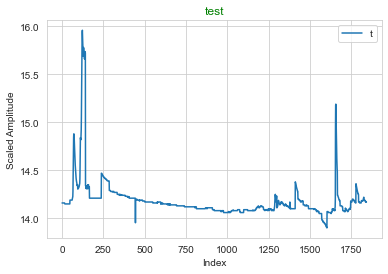

<Figure size 1600x800 with 0 Axes>

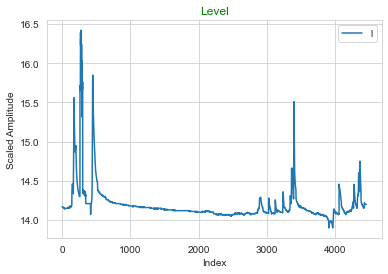

<Figure size 1600x800 with 0 Axes>

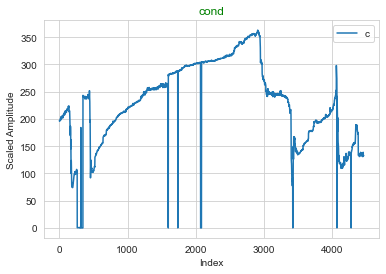

<Figure size 1600x800 with 0 Axes>

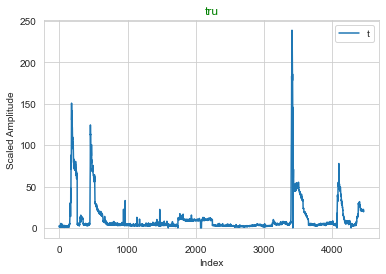

In [5]:
plt.figure(figsize=(20, 10), dpi=80)

testlev = DataFrame(test.values[:,2:3])
testlev.plot()
plt.xlabel('Index') 
plt.ylabel('Scaled Amplitude') 
plt.title("test", color='green')
plt.legend('test')
plt.show()
testcond = DataFrame(test.values[:,3:4])
testtur = DataFrame(test.values[:,4:5])
plt.figure(figsize=(20, 10), dpi=80)
level = DataFrame(dftotal.values[:,2:3])
level.plot()
#plt.scatter(level.values[:,0:1],level.values[:,1:2],color='green')
plt.xlabel('Index') 
plt.ylabel('Scaled Amplitude') 
plt.title("Level", color='green')
plt.legend('level')
plt.show()
plt.figure(figsize=(20, 10), dpi=80)
cond = DataFrame(dftotal.values[:,3:4])
cond.plot()
#plt.scatter(level.values[:,0:1],cond.values[:,0:1],color='red')
plt.xlabel('Index') 
plt.ylabel('Scaled Amplitude') 
plt.title("cond", color='green')
plt.legend('cond')
plt.show()
plt.figure(figsize=(20, 10), dpi=80)
tru = DataFrame(dftotal.values[:,4:5])
tru.plot()
#plt.scatter(level.values[:,0:1],tru.values[:,0:1],color='blue')
plt.xlabel('Index') 
plt.ylabel('Scaled Amplitude') 
plt.title("tru", color='green')
plt.legend('tru')
plt.show()


<AxesSubplot:>

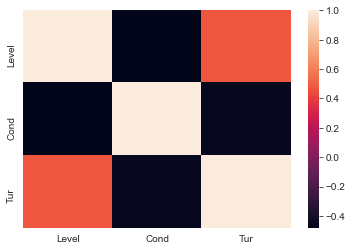

In [6]:
dfcorr = df[df.columns[0:4] ]
corr =  pd.DataFrame(dfcorr).corr()
sns.heatmap(corr)

In [7]:

import statsmodels
from statsmodels.tsa.stattools import adfuller
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
    def ADF_Stationarity_Test(self, timeseries, printResults = True):
        #Dickey-Fuller test:
        adfTest = adfuller(timeseries)
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)
sTest = StationarityTests()
            

# KPSS Test
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw,nlags=len(series)-1)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')



In [8]:
sTest.ADF_Stationarity_Test(level, printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))
kpss_test(level)


Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -6.555469e+00
P-Value                 8.638678e-09
# Lags Used             3.200000e+01
# Observations Used     4.428000e+03
Critical Value (1%)    -3.431828e+00
Critical Value (5%)    -2.862193e+00
Critical Value (10%)   -2.567118e+00
dtype: float64
Is the time series stationary? True
KPSS Statistic: 0.5000000000000036
p-value: 0.041666666666665866
num lags: 4460
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


(0.0, 600.0)

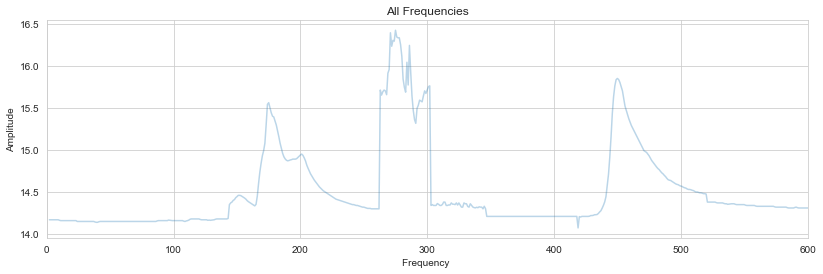

In [9]:
from scipy import fft
fft_output = fft.fft(level)
power = np.abs(fft_output)
freq = fft.fftfreq(len(level),d=1/4460)
mask = freq >= 0
freqlev = freq[mask]
powerlev = power[mask]
plt.figure( figsize=(30, 4) )
ax1 = plt.subplot( 1, 2, 2 )
ax1.plot(freqlev[2:], powerlev[2:], label='signal', alpha=0.3)
ax1.set_title('All Frequencies')
ax1.set_ylabel( 'Amplitude' )
ax1.set_xlabel( 'Frequency ' )
ax1.set_xlim([0, 600])

(100.0, 200.0)

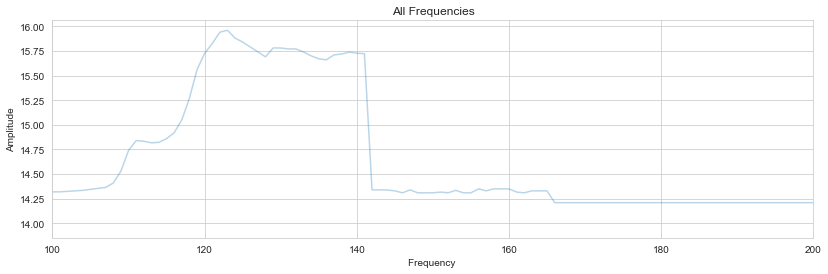

In [10]:
from scipy import fft
fft_output = fft.fft(testlev)
power = np.abs(fft_output)
freq = fft.fftfreq(len(testlev),d=1/1842 )
mask = freq >= 0
freqtes = freq[mask]
powertes = power[mask]
plt.figure( figsize=(30, 4) )
ax1 = plt.subplot( 1, 2, 2 )
ax1.plot(freqtes[2:], powertes[2:], label='signal', alpha=0.3)
ax1.set_title('All Frequencies')
ax1.set_ylabel( 'Amplitude' )
ax1.set_xlabel( 'Frequency ' )
ax1.set_xlim([100,200])

(0.0, 1400.0)

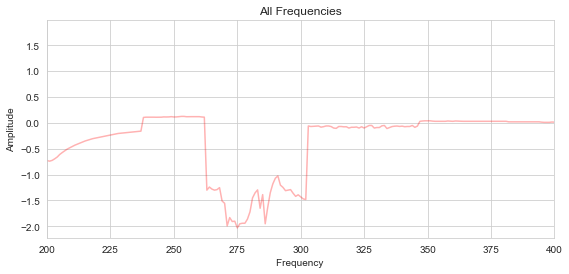

<Figure size 432x288 with 0 Axes>

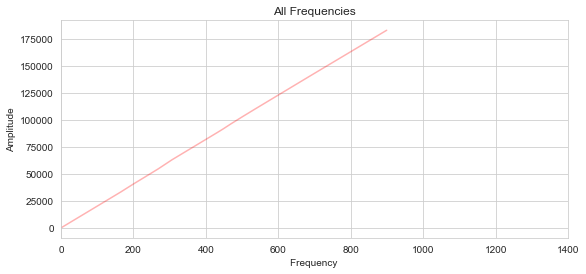

In [11]:
import scipy as sp 
def get_top_n_frequencies(n, freqs, amplitudes, min_amplitude_threshold = None):
    '''
    Gets the top N frequencies: a sorted list of tuples (freq, amplitudes)
    
    This is a rather naive implementation. For a better implementation, see get_top_n_frequency_peaks
    
    '''
    
    #print(amplitudes)
    if min_amplitude_threshold is not None:
        amplitude_indices = np.where(amplitudes >= min_amplitude_threshold)
        amplitudes = amplitudes[amplitude_indices]
        freqs = freqs[amplitude_indices]
        
    if n < len(amplitudes):
        ind = np.argpartition(amplitudes, -n)[-n:] # from https://stackoverflow.com/a/23734295
        ind_sorted_by_coef = ind[np.argsort(-amplitudes[ind])] # reverse sort indices
    else:
        ind_sorted_by_coef = np.argsort(-amplitudes)

    return_list = list(zip(freqs[ind_sorted_by_coef], amplitudes[ind_sorted_by_coef]))
    return return_list
def get_top_n_frequency_peaks(n, freqs, amplitudes, min_amplitude_threshold = None):
    ''' Finds the top N frequencies and returns a sorted list of tuples (freq, amplitudes) '''
    
    # Use SciPy signal.find_peaks to find the frequency peaks
    # TODO: in future, could add in support for min horizontal distance so we don't find peaks close together
    fft_peaks_indices, fft_peaks_props = sp.signal.find_peaks(amplitudes, height = min_amplitude_threshold)
    
    freqs_at_peaks = freqs[fft_peaks_indices]
    amplitudes_at_peaks = amplitudes[fft_peaks_indices]
    
    if n < len(amplitudes_at_peaks):
        ind = np.argpartition(amplitudes_at_peaks, -n)[-n:] # from https://stackoverflow.com/a/23734295
        ind_sorted_by_coef = ind[np.argsort(-amplitudes_at_peaks[ind])] # reverse sort indices
    else:
        ind_sorted_by_coef = np.argsort(-amplitudes_at_peaks)

    return_list = list(zip(freqs_at_peaks[ind_sorted_by_coef], amplitudes_at_peaks[ind_sorted_by_coef]))
    return return_list
#print(get_top_n_frequency_peaks(10,np.ravel(freq[0:500]),np.ravel(power[0:500])))
#print(get_top_n_frequencies(10,np.ravel(freq[0:500]),np.ravel(power[0:500])))
correlate_result = np.correlate(np.ravel(level.values[0:1800]), np.ravel(testlev.values[0:1800]) , 'full')
#print(correlate_result)      
plt.figure(0)
plt.figure( figsize=(20, 4) )
ax1 = plt.subplot( 1, 2, 2 )
 

#ax1.plot(freq[0:], power[0:], label='signal',color='green', alpha=0.3)
#ax1.plot(freq[0:500], correlate_result[0:500], label='signal',color='red', alpha=0.3)
ax1.plot(freqtes[0:800],(powertes[0:800]-powerlev[0:800]), label='signal',color='red', alpha=0.3)

#plt.figure(1)
#ax1.plot(freq[2:250], sh[2:250], label='signal',color='green', alpha=0.3)
#ax1.plot(freq2[2:250]+20, sh2[2:250], label='signal',color='red', alpha=0.3)
ax1.set_title('All Frequencies')
ax1.set_ylabel( 'Amplitude' )
ax1.set_xlabel( 'Frequency ' )
ax1.set_xlim([200, 400])
plt.figure(0)
plt.figure( figsize=(20, 4) )
ax1 = plt.subplot( 1, 2, 2 )
 

#ax1.plot(freq[0:], power[0:], label='signal',color='green', alpha=0.3)
ax1.plot(freq[0:900], correlate_result[0:900], label='signal',color='red', alpha=0.3)
#ax1.plot(freq[0:500],(power[0:500]-powery[0:500]), label='signal',color='red', alpha=0.3)

#plt.figure(1)
#ax1.plot(freq[2:250], sh[2:250], label='signal',color='green', alpha=0.3)
#ax1.plot(freq2[2:250]+20, sh2[2:250], label='signal',color='red', alpha=0.3)
ax1.set_title('All Frequencies')
ax1.set_ylabel( 'Amplitude' )
ax1.set_xlabel( 'Frequency ' )
ax1.set_xlim([0, 1400])

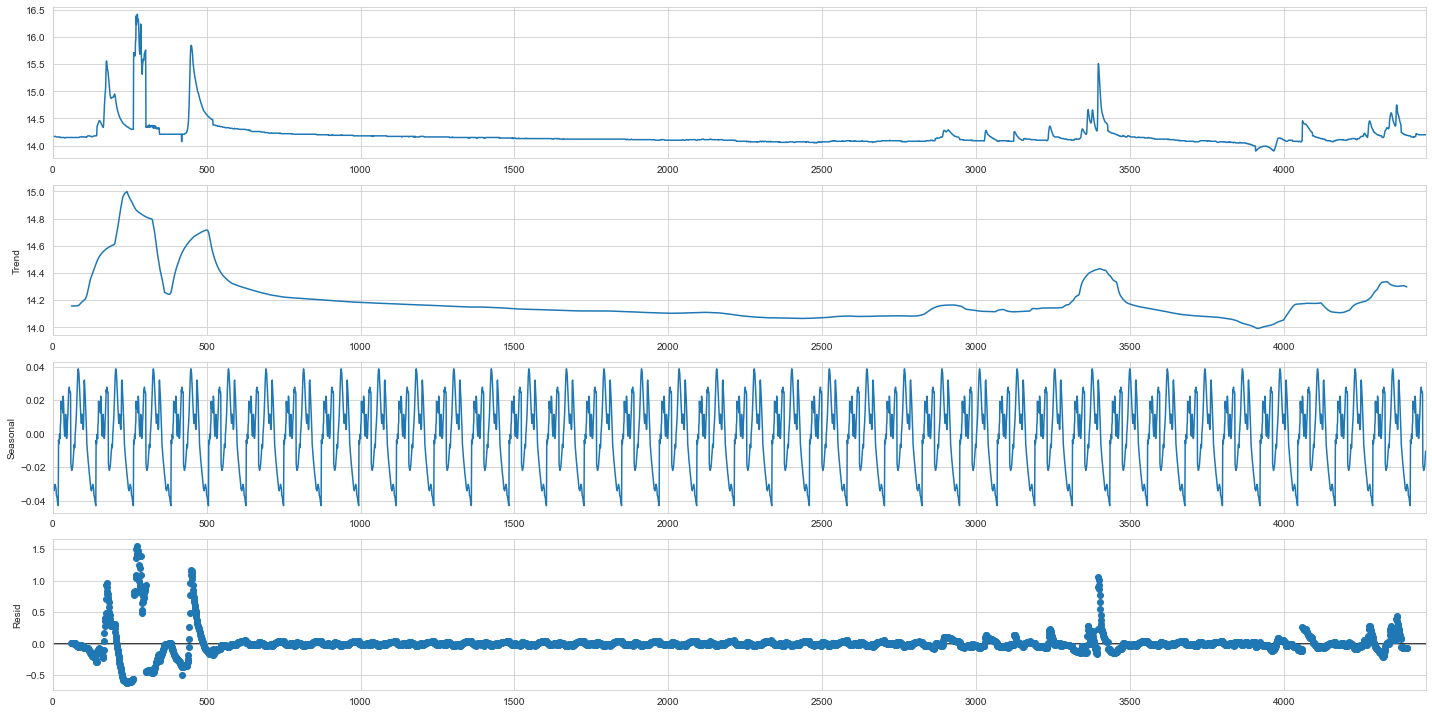

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
result_add = seasonal_decompose(level, model='additive', period=122)

# Plot
plt.rcParams.update({'figure.figsize': (20,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('', fontsize=24)
plt.show()
residuals = np.nan_to_num(result_add.resid)
levelframe = h2o.H2OFrame(residuals)


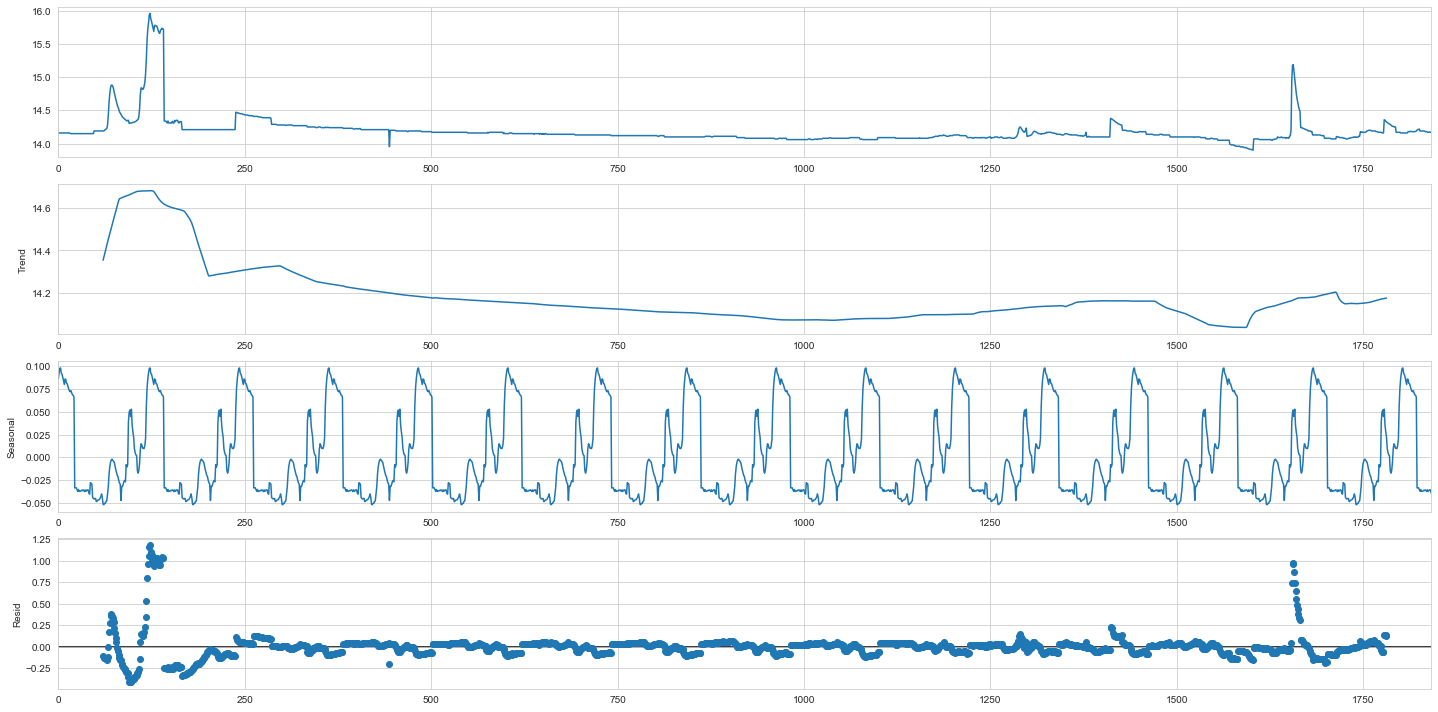

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [13]:
result_add = seasonal_decompose(testlev, model='additive', period=120)

# Plot
plt.rcParams.update({'figure.figsize': (20,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('', fontsize=24)
plt.show()
residuals = np.nan_to_num(result_add.resid)
testlevfram = h2o.H2OFrame(residuals)


In [14]:
sTest.ADF_Stationarity_Test(cond, printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))
kpss_test(cond)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic        -2.940015
P-Value                    0.040889
# Lags Used               17.000000
# Observations Used     4443.000000
Critical Value (1%)       -3.431823
Critical Value (5%)       -2.862191
Critical Value (10%)      -2.567116
dtype: float64
Is the time series stationary? True
KPSS Statistic: 0.5000000000000019
p-value: 0.04166666666666624
num lags: 4460
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


(250.0, 500.0)

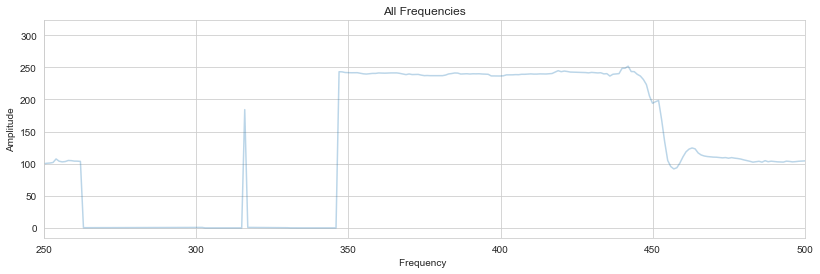

In [15]:
from scipy import fft

fft_output = fft.fft(cond)
power = np.abs(fft_output)
freq = fft.fftfreq(len(cond),d=1/4460)



mask = freq >= 0
freq = freq[mask]
power = power[mask]

plt.figure( figsize=(30, 4) )

ax1 = plt.subplot( 1, 2, 2 )
ax1.plot(freq[2:], power[2:], label='signal', alpha=0.3)
ax1.set_title('All Frequencies')
ax1.set_ylabel( 'Amplitude' )
ax1.set_xlabel( 'Frequency ' )
ax1.set_xlim([250, 500])

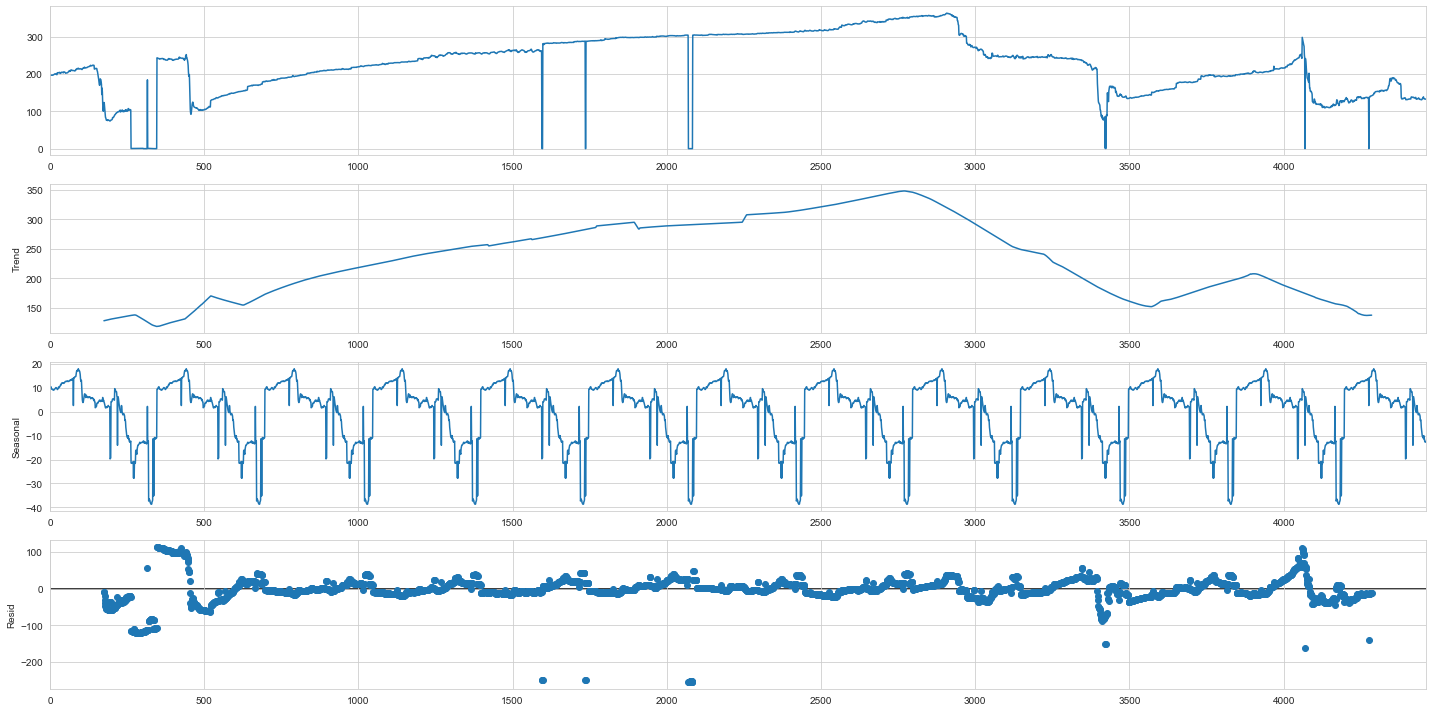

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [16]:
result_add = seasonal_decompose(cond, model='additive', period=350)

# Plot
plt.rcParams.update({'figure.figsize': (20,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('', fontsize=24)
plt.show()
residuals = np.nan_to_num(result_add.resid)
Condframe = h2o.H2OFrame(residuals)

(100.0, 250.0)

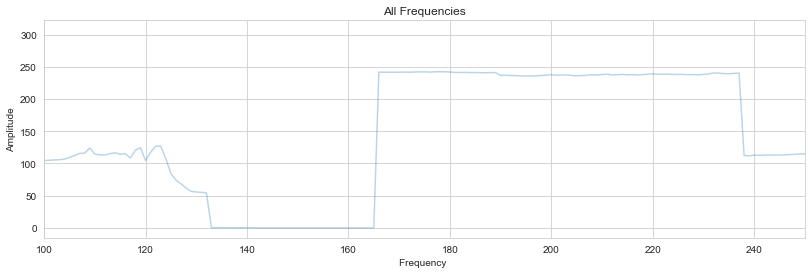

In [17]:
from scipy import fft

fft_output = fft.fft(testcond)
power = np.abs(fft_output)
freq = fft.fftfreq(len(testcond),d=1/1842 )



mask = freq >= 0
freq = freq[mask]
power = power[mask]

plt.figure( figsize=(30, 4) )

ax1 = plt.subplot( 1, 2, 2 )
ax1.plot(freq[2:], power[2:], label='signal', alpha=0.3)
ax1.set_title('All Frequencies')
ax1.set_ylabel( 'Amplitude' )
ax1.set_xlabel( 'Frequency ' )
ax1.set_xlim([100, 250])

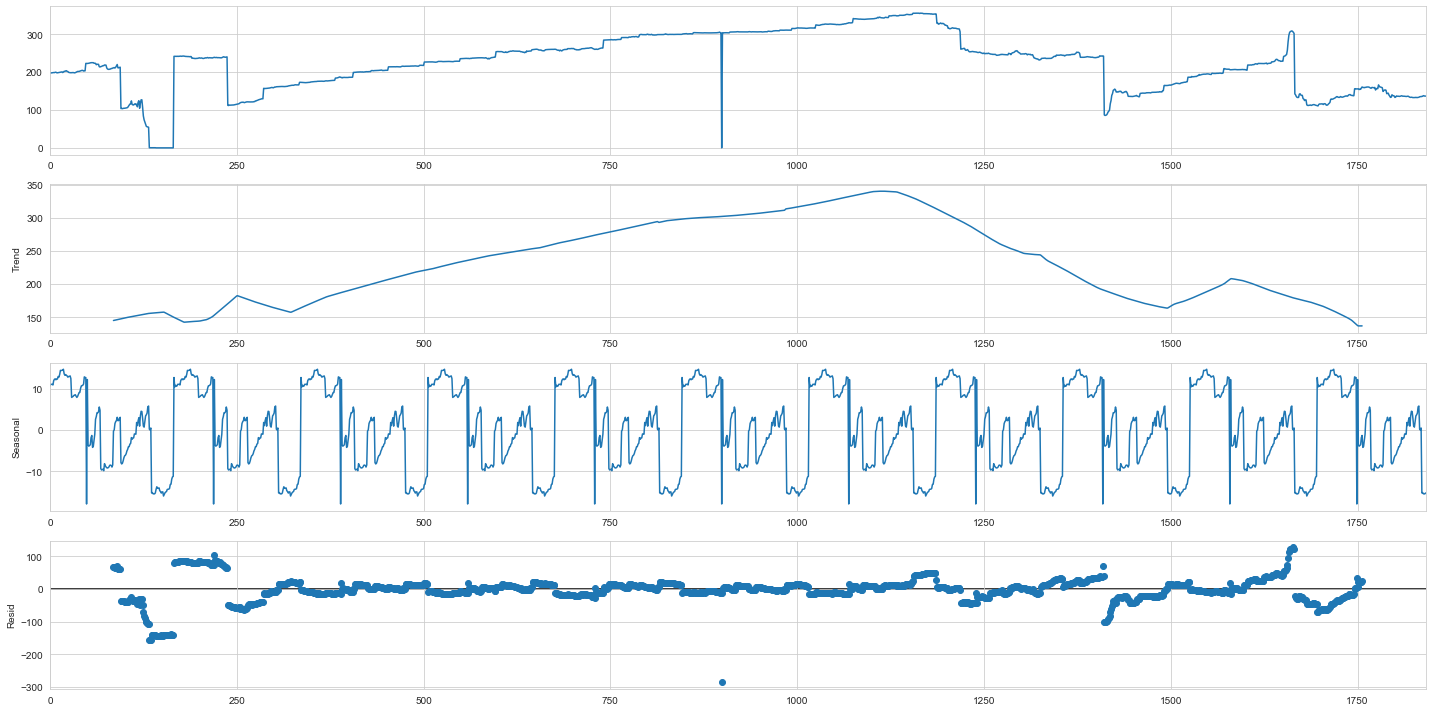

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [18]:
result_add = seasonal_decompose(testcond, model='additive', period=170)

# Plot
plt.rcParams.update({'figure.figsize': (20,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('', fontsize=24)
plt.show()
residuals = np.nan_to_num(result_add.resid)
testCondframe = h2o.H2OFrame(residuals)

In [19]:
sTest.ADF_Stationarity_Test(tru, printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))
kpss_test(tru)

Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -6.081438e+00
P-Value                 1.089785e-07
# Lags Used             2.200000e+01
# Observations Used     4.438000e+03
Critical Value (1%)    -3.431824e+00
Critical Value (5%)    -2.862191e+00
Critical Value (10%)   -2.567117e+00
dtype: float64
Is the time series stationary? True
KPSS Statistic: 0.5000000000000061
p-value: 0.0416666666666653
num lags: 4460
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


(0.0, 2000.0)

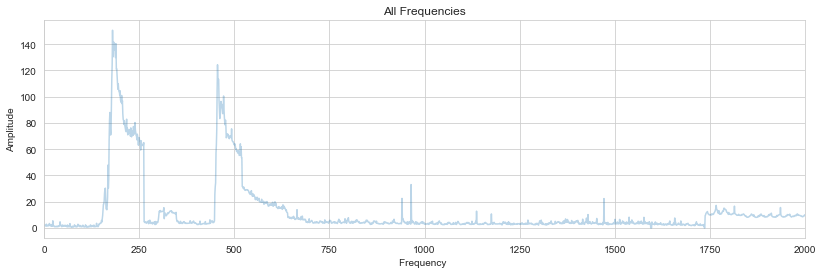

In [20]:
fft_output = fft.fft(tru)
power = np.abs(fft_output)
freq = fft.fftfreq(len(tru),d=1/4460)



mask = freq >= 0
freq = freq[mask]
power = power[mask]

plt.figure( figsize=(30, 4) )

ax1 = plt.subplot( 1, 2, 2 )
ax1.plot(freq[2:], power[2:], label='signal', alpha=0.3)
ax1.set_title('All Frequencies')
ax1.set_ylabel( 'Amplitude' )
ax1.set_xlabel( 'Frequency ' )
ax1.set_xlim([0, 2000])

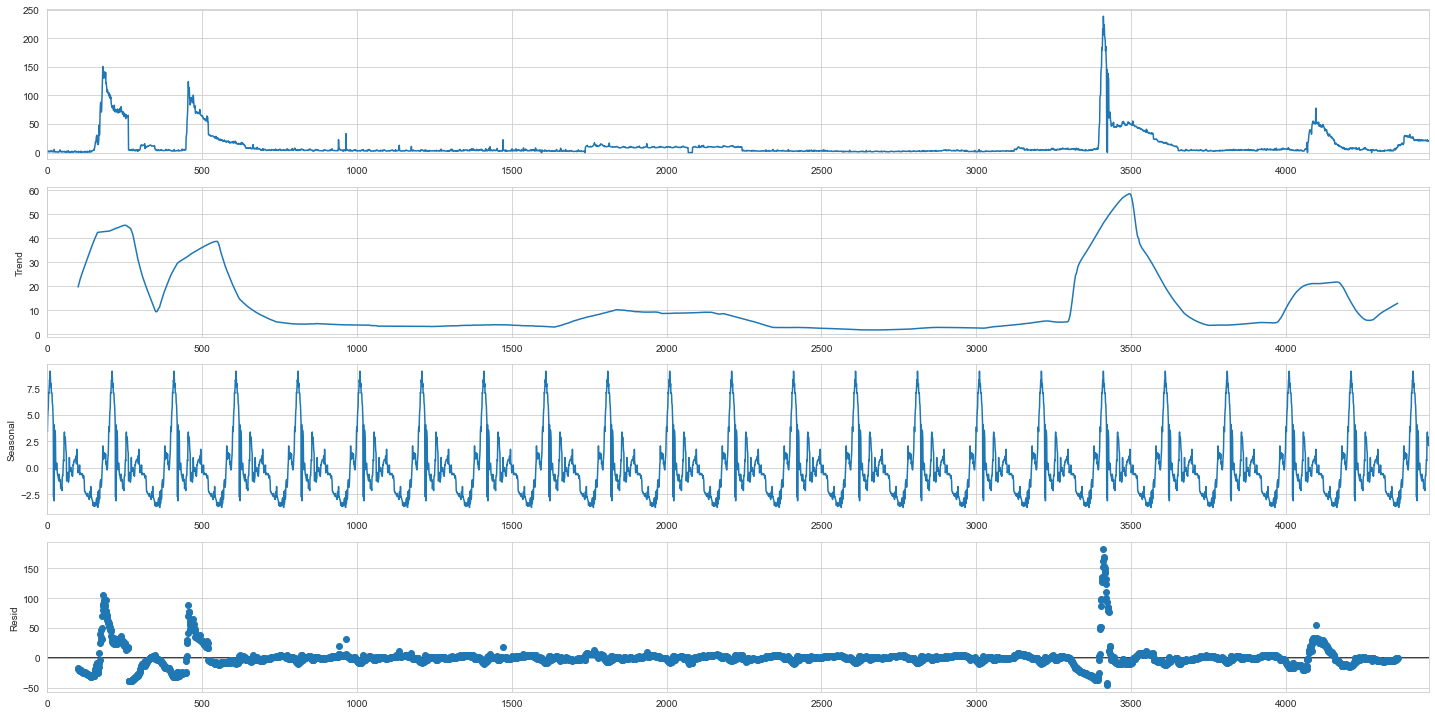

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [21]:
result_add = seasonal_decompose(tru, model='additive', period=200)

# Plot
plt.rcParams.update({'figure.figsize': (20,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('', fontsize=24)
plt.show()
residuals = np.nan_to_num(result_add.resid)
Turframe = h2o.H2OFrame(residuals)


(0.0, 2000.0)

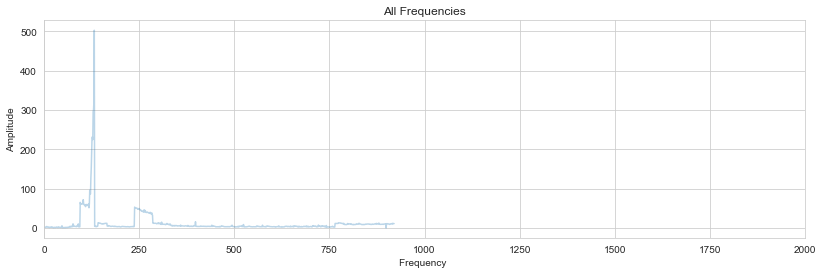

In [22]:
fft_output = fft.fft(testtur)
power = np.abs(fft_output)
freq = fft.fftfreq(len(testtur),d=1/1842 )



mask = freq >= 0
freq = freq[mask]
power = power[mask]

plt.figure( figsize=(30, 4) )

ax1 = plt.subplot( 1, 2, 2 )
ax1.plot(freq[2:], power[2:], label='signal', alpha=0.3)
ax1.set_title('All Frequencies')
ax1.set_ylabel( 'Amplitude' )
ax1.set_xlabel( 'Frequency ' )
ax1.set_xlim([0, 2000])

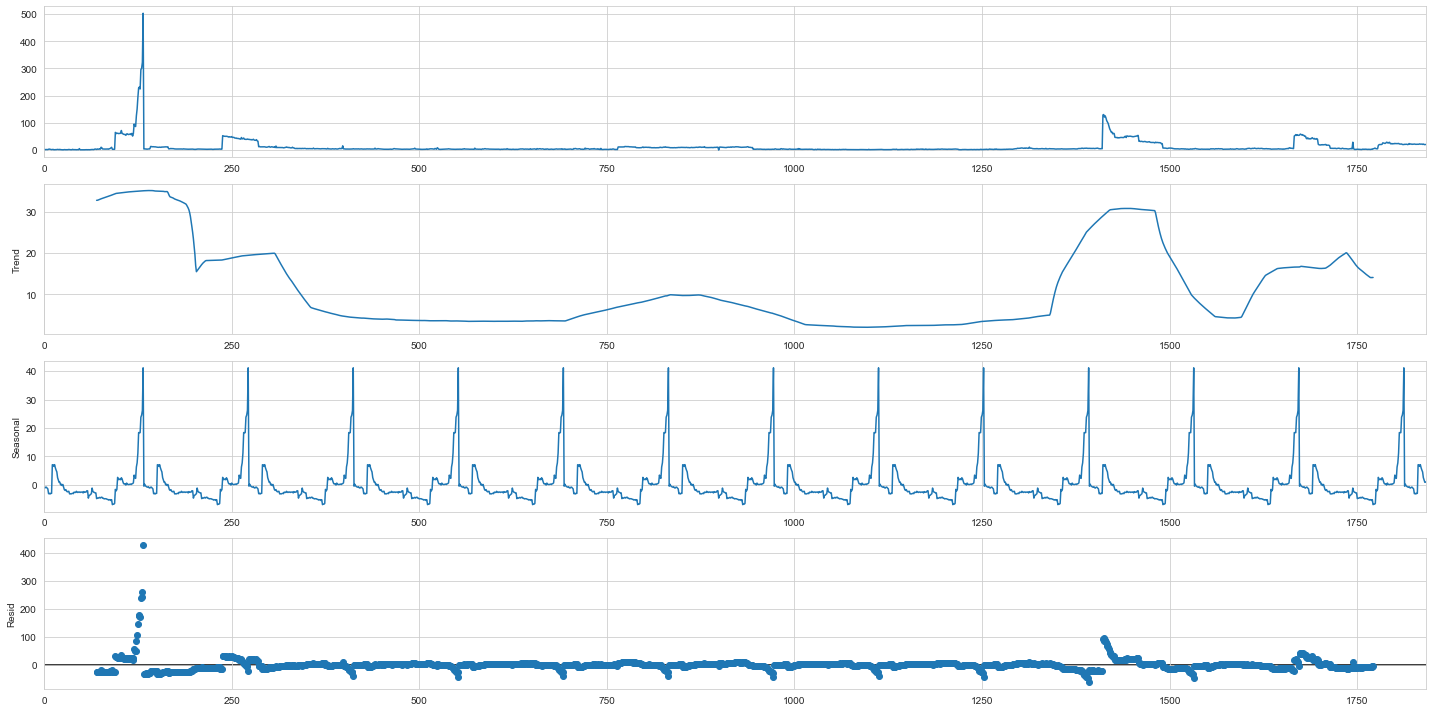

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [23]:
result_add = seasonal_decompose(testtur, model='additive', period=140)

# Plot
plt.rcParams.update({'figure.figsize': (20,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('', fontsize=24)
plt.show()
residuals = np.nan_to_num(result_add.resid)
testTurframe = h2o.H2OFrame(residuals)


In [24]:

from sklearn.metrics import confusion_matrix
#testX= h2o.H2OFrame(tesX)
#levelframe=levelframe.cbind(Turframe)
levelframe=levelframe.cbind(Condframe)

levelframe=levelframe.fillna()

#train, valid= levelframe.split_frame(ratios = [.8], seed = 1234)
#hh=pd.DataFrame(g.sum().values[:,4:5])
#ytrain, yvalid= h2o.H2OFrame(hh).split_frame(ratios = [.8], seed = 1234)
# Set the predictors
predictors = levelframe.col_names

# Define an Extended Isolation forest model
eif = H2OExtendedIsolationForestEstimator(ntrees =250,
                                          sample_size = 5)

#Train Extended Isolation Forest
eif.train(x = predictors, training_frame = levelframe)
#testlevfram=testlevfram.cbind(testTurframe)
# Calculate score
testlevfram=testlevfram.cbind(testCondframe)

eif_result = eif.predict(testlevfram.fillna())


anomaly_score = eif_result["anomaly_score"]
print(len(anomaly_score))

# Average path length  of the point in Isolation Trees from root to the leaf
mean_length = eif_result["mean_length"]

#tniltest =np.array(len(testy))


extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%
1842


In [25]:
dd=h2o.as_list(anomaly_score)

ff = np.zeros(len(tesX.values[:,5:6]))

for i in range(0, len(tesX.values[:,5:6])):
 
 if tesX.values[i,5:6]> 0:
    ff[i]=1
print(ff)
ff=h2o.as_list(h2o.H2OFrame(ff))
fpr, tpr, thresholds = roc_curve(ff,dd)

print(roc_auc_score( ff["C1"],dd))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)


[0. 0. 0. ... 0. 0. 0.]
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
0.5827151464493435
Threshold value is: 0.5512537189907368


In [26]:
testlevel=pd.DataFrame(ff["C1"],columns=["C1"])
typlevel=pd.DataFrame(dd,columns=["anomaly_score"])
optimal_cond=optimal_threshold

for j in range(len(typlevel)):
 #typlevel[j]["mean_length"] 
 if typlevel["anomaly_score"][j]>=optimal_threshold:
   typlevel["anomaly_score"][j]=1
 else:
   typlevel["anomaly_score"][j]  =0



In [27]:
from sklearn.metrics import f1_score
score = f1_score (ff["C1"],(typlevel.values[:,0:1]), average='micro')
score2=accuracy_score((typlevel.values[:,0:1]),ff, normalize=True)
score3=accuracy_score((typlevel.values[:,0:1]),ff, normalize=False)
print('F1 Score: %.3f' % score)
print('accuracy_score normalize: %.3f' % score2)
print('accuracy_score not normalize: %.3f' % score3)

F1 Score: 0.928
accuracy_score normalize: 0.928
accuracy_score not normalize: 1709.000


In [28]:
testlev.insert(0, 'id', range(1, 1 + len(testlev)))
x=(testlev.values[:,0:1])
y=(testlev.values[:,1:2])
#z=typlevel["anomaly_score"]
r=ff

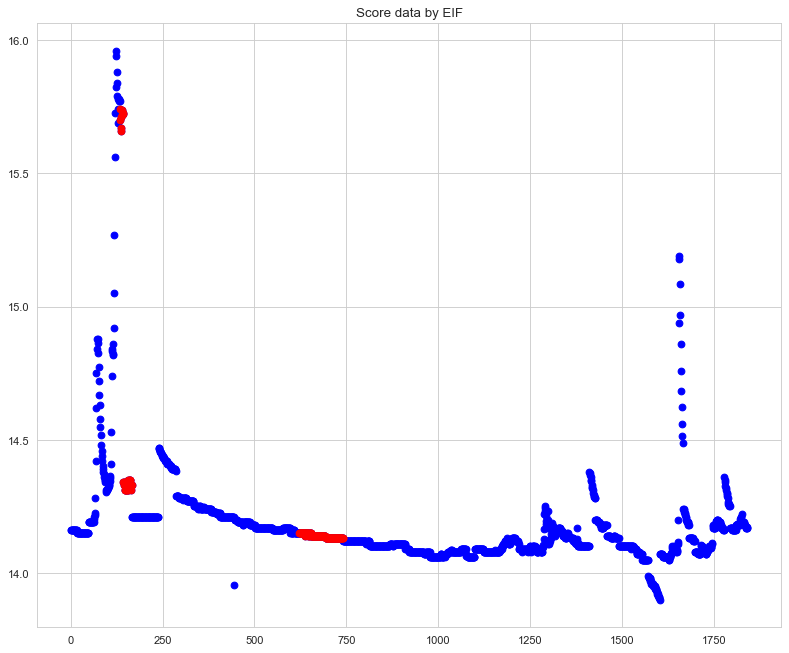

In [29]:
plt.figure(figsize=(12, 10), dpi=80)
plt.scatter(x,y,color='blue')

plt.scatter(x[r[:]>=1],y[r[:]>=1],c='red')

plt.title('Score data by EIF')
plt.show()


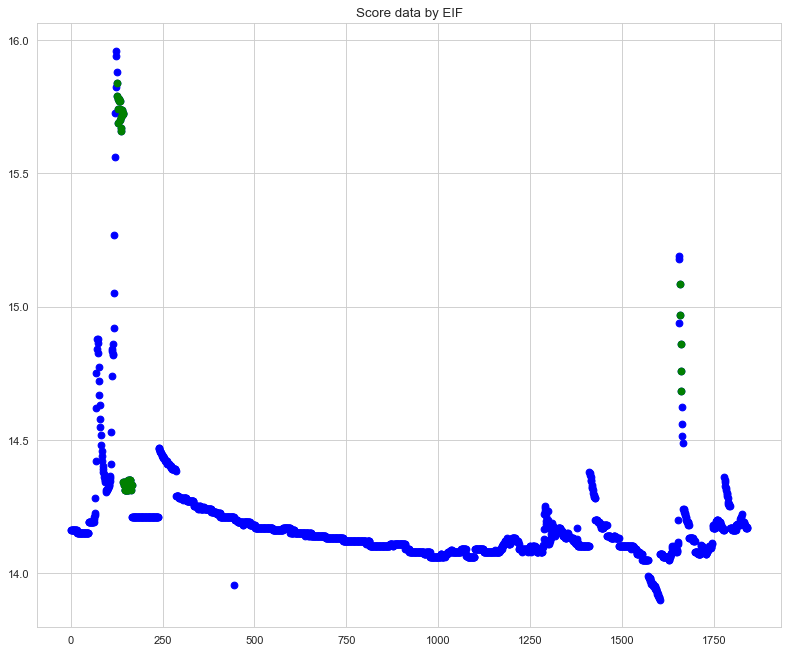

In [30]:
plt.figure(figsize=(12, 10), dpi=80)
plt.scatter(x,y,color='blue')

plt.scatter(x[h2o.as_list(anomaly_score)[:]>=optimal_threshold],y[h2o.as_list(anomaly_score)[:]>=optimal_threshold],c='green')

plt.title('Score data by EIF')
plt.show()


(1842, 2)


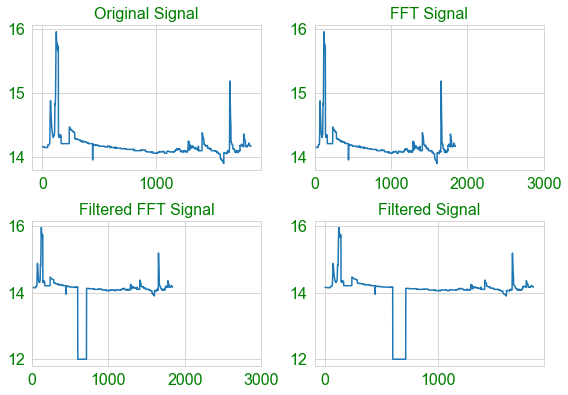

In [31]:

from scipy.fftpack import rfft, irfft, fftfreq, fft, ifft
import matplotlib as mpl

#===========================================
#GETTING DATA AND SETTING CONSTANTS
#===========================================



f_signal = rfft(tesX.values[:,1:2])


freqy = fftfreq(len(tesX.values[:,1:2]),d=1/800)

#THE FFT TRANSFORM & FILTERING
#=============================================
#signal filtering
freqmin = 400
freqmax = 600


cut_f_signal = f_signal.copy()

cut_f_signal[(freqy>=260) & (freqy<310) ] = 12
cut_signal = irfft(cut_f_signal)

print(testlev.shape)

plt.figure(figsize=(8,8))

ax1 = plt.subplot(321)
ax1.plot(tesX.values[:,1:2])
ax1.set_title("Original Signal", color='green', fontsize=16)

ax2 = plt.subplot(322)
ax2.plot(np.abs(f_signal))
plt.xlim(0,3000)
ax2.set_title("FFT Signal", color='green', fontsize=16)

ax3 = plt.subplot(323)
ax3.plot(cut_f_signal)
plt.xlim(0,3000)
ax3.set_title("Filtered FFT Signal", color='green', fontsize=16)

ax4 = plt.subplot(324)
ax4.plot(cut_signal)

ax4.set_title("Filtered Signal", color='green', fontsize=16)

for i in [ax1,ax2,ax3,ax4]:
    i.tick_params(labelsize=16, labelcolor='green')

plt.tight_layout()
plt.show()

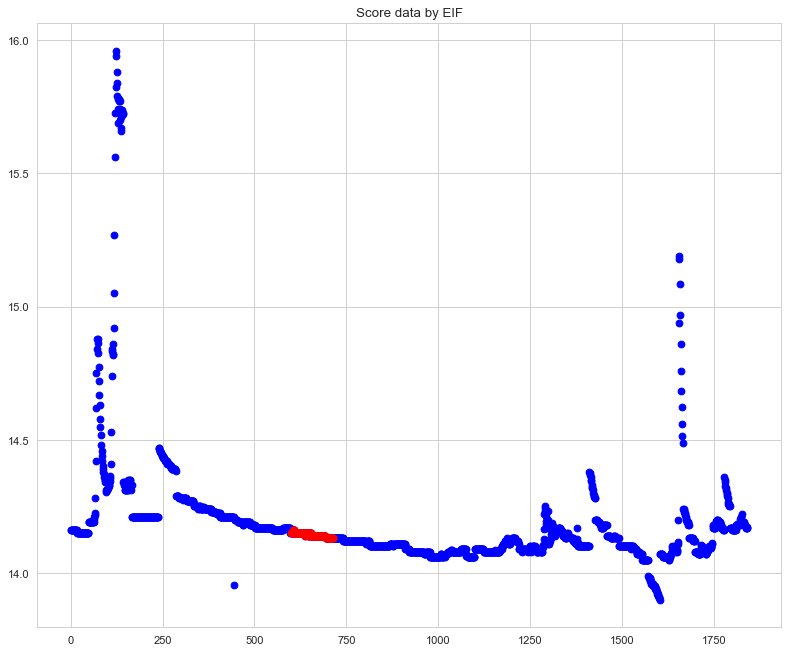

In [32]:
z=cut_signal
plt.figure(figsize=(12, 10), dpi=80)
plt.scatter(x,y.flatten(),color='blue')
plt.scatter(x[z[:]==12],y[z[:]==12],c='red')

plt.title('Score data by EIF')
plt.show()


In [33]:
dd2 =  np.zeros(len(tesX.values[:,5:6]))

for i in range(0, len(tesX.values[:,5:6])):
 
 if z[i]==12:
    dd2[i]=1
 else:
    dd2[i]=0



ff = np.zeros(len(tesX.values[:,5:6]))
for i in range(0, len(tesX.values[:,1:2])):
 
 if tesX.values[i,5:6]> 0:
    ff[i]=1
ff=h2o.as_list(h2o.H2OFrame(ff))
dd=(np.array(dd2, dtype=bool)|np.array(typlevel, dtype=bool))

dd=dd[:,0:1]
fpr, tpr, thresholds = roc_curve(ff,dd)

print(roc_auc_score(np.array( ff["C1"], dtype=bool),dd))
optimal_idx = np.argmax(tpr - fpr)

score = f1_score (ff,dd, average='micro')
score2=accuracy_score(dd,np.array( ff["C1"], dtype=bool), normalize=True)
score3=accuracy_score(dd,np.array( ff["C1"], dtype=bool), normalize=False)
print('F1 Score: %.3f' % score)
print('accuracy_score normalize: %.3f' % score2)
print('accuracy_score not normalize: %.3f' % score3)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
0.6039947062306272
F1 Score: 0.928
accuracy_score normalize: 0.928
accuracy_score not normalize: 1709.000


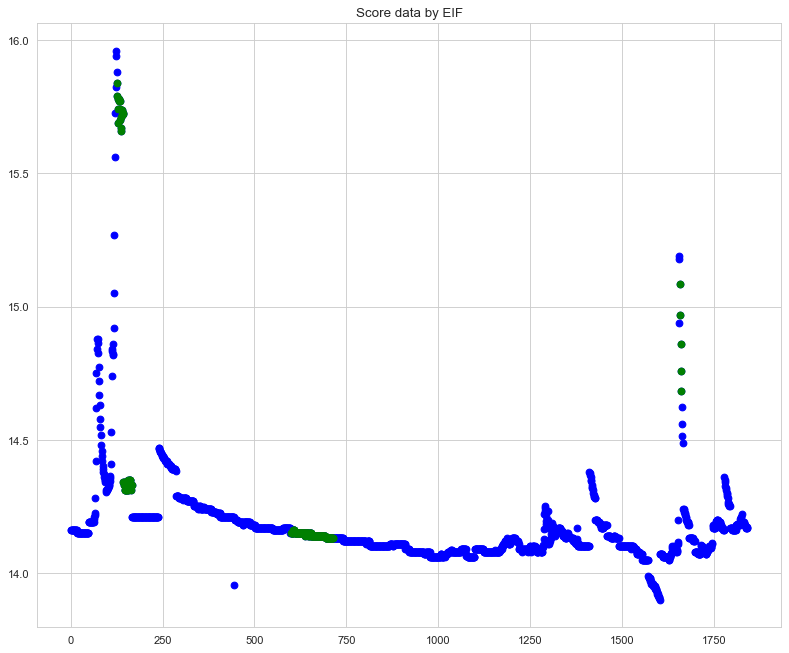

In [34]:
z=cut_signal
plt.figure(figsize=(12, 10), dpi=80)
plt.scatter(x,y.flatten(),color='blue')
plt.scatter(x[z[:]==12],y[z[:]==12],c='green')
plt.scatter(x[h2o.as_list(anomaly_score)[:]>=optimal_threshold],y[h2o.as_list(anomaly_score)[:]>=optimal_threshold],c='green')

plt.title('Score data by EIF')
plt.show()
